<a href="https://colab.research.google.com/github/ludovicolanni/neural-music-composer/blob/master/Text2Midi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From Symbolic Text to MIDI File

In [ ]:
!pip install pretty-midi

import os
import numpy as np
import matplotlib.pyplot as plt
import pretty_midi

     |████████████████████████████████| 5.6MB 2.5MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-cp36-none-any.whl size=5591953 sha256=0a6bd214ea7fe74444aa9565f0221260cd2e354173c404d3f1cd16f97efcd9e9
  Stored in directory: /root/.cache/pip/wheels/4c/a1/c6/b5697841db1112c6e5866d75a6b6bf1bef73b874782556ba66
Successfully built pretty-midi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/RNN_generatedtext/results_lstm_t05_n1000.txt', 'r') as file:
    results_lstm_t05_n1000 = file.read()

In [ ]:
results_lstm_t05_n1000

' F4-67|B4-75 e e F#4-66|A4-82 e A4-73 D#4-71 D#4-71 A4-73 C#4-56|A4-65 e F#5-63 F#5-63 B4-45|F#5-63 B4-45 A4-51 e E4-44 e G#4-69 e e A3-47|E4-59 E4-59 A4-71 G#4-80 e G#3-61|E4-67 E4-67|A4-65 E3-77 E4-76 A3-63|E4-82 A3-63|E4-82|C#5-83 E4-82|A4-84 F#3-69|G#4-88 e G#3-69|E4-76 G#3-69|E4-76|E5-83 C#5-88|D#5-90 A3-86|B4-79 e B3-87|G#4-87|A4-79 B4-83 e F#4-85 e E2-74|E4-77 E2-74|E4-77 E2-74|E4-77 E2-74|E4-77 E2-74|E4-77|E5-86 E2-74|E4-77|E5-86 E2-74|E4-77|E5-86|F5-82 E2-74|E4-77|E5-86|F5-82 E2-54|F5-82 E2-54|D5-72 A2-57|F5-73 G2-49|D5-66 G2-47|A4-63 G4-63 G4-62 G4-60 A4-61 B4-63 A4-63 A4-65 A4-65 A2-57|B4-66 A2-69|B4-70 A2-67 G2-67 G2-61|B4-70 A2-57|C5-71 D2-57|G3-61|F#4-71 D2-59|A4-66 F2-51|A#3-51|A4-69 C3-63|D4-59|D5-65 A2-51|D3-59|D5-59 C2-59|A3-59|G4-65|C5-62 A2-53|A#3-56|A#4-66|D5-66 A2-45|D3-54|A4-65|C5-64 A2-45|C3-54|D5-58 C2-51|C3-53|A#4-59 G2-51|A3-56|A4-62 B2-50|A3-50|A4-63 A2-53|C#3-56|A3-57|A4-53 C3-51|A3-60|C#4-63|E4-64 A2-44|C3-55|C3-60|E4-65 A2-47|D3-62|F#4-61 A2-57|F3-56|A3-

## Text to Piano-roll

In [ ]:
# convert a text string into a piano-roll format

def text_to_pianoroll(test):

  ''' This function converts a symbolic music textual sequence, namely test, into a piano-roll matrix of shape (pitches,timesteps)  '''

  # string to list of strings (each element will be a column of the matrix)
  list_s = test.split(" ")[1:-1]

  # initialise the matrix
  mat = np.zeros(shape=(128,len(list_s)))

  # loop over each string of the main string

  for c in range(len(list_s)):

    test_element = list_s[c]

    if test_element=='e':
      mat=mat

    elif test_element=='':
      mat=mat

    else:

      # get the pitches and the velocities

      # decompose the string
      test_element_decomposed = test_element.split('|')

      # fill the matrix with velocities for the right pitch values

      for i in test_element_decomposed:

        pit_vel = i.split('-')

        pitch = pretty_midi.note_name_to_number(pit_vel[0])
        velocity = float(pit_vel[1])

        if pitch in range(mat.shape[0]):
          
          mat[pitch, c] = velocity

        else:
          mat=mat

  return mat



In [ ]:
# apply the function

pr_lstm_t05_n1000 = text_to_pianoroll(results_lstm_t05_n1000)

In [ ]:
# let's plot the piano-roll matrix -> first importing libraries

!pip install mir-eval
!pip install librosa

import mir_eval.display
import librosa.display

     |████████████████████████████████| 92kB 2.2MB/s 
  Created wheel for mir-eval: filename=mir_eval-0.6-cp36-none-any.whl size=96515 sha256=bf6032517e76d41c41b83c3b6bf3f5e8062988d3169d82857e30f4230eb6b241
  Stored in directory: /root/.cache/pip/wheels/49/ce/30/730fa72addf275e49d90683b01b3613048b4be3bf7ff8eb6ec
Successfully built mir-eval


In [ ]:
# define the plotting function

def plot_piano_roll(pr, start_pitch=0, end_pitch=127, fs=8):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pr[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))


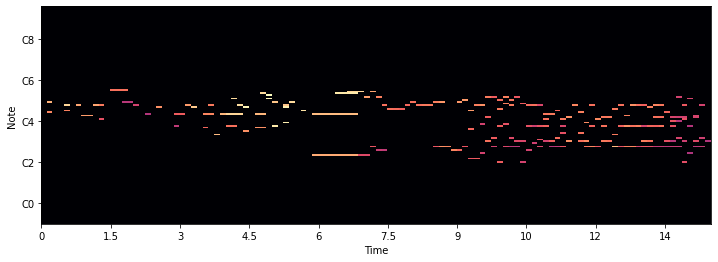

In [ ]:
# plot the piano-roll matrix

plt.figure(figsize=(12, 4))
plot_piano_roll(pr_lstm_t05_n1000)

## Piano-roll to MIDI

In [ ]:
# Here I use the code by Colin Raffel available on Github at the Pretty-midi official documentation

In [ ]:
# convert piano-roll to pretty_midi format

def piano_roll_to_pretty_midi(piano_roll, fs=8, program=0):
    '''Convert a Piano Roll array into a PrettyMidi object
     with a single instrument.
    Parameters
    ----------
    piano_roll : np.ndarray, shape=(128,frames), dtype=int
        Piano roll of one instrument
    fs : int
        Sampling frequency of the columns, i.e. each column is spaced apart
        by ``1./fs`` seconds.
    program : int
        The program number of the instrument.
    Returns
    -------
    midi_object : pretty_midi.PrettyMIDI
        A pretty_midi.PrettyMIDI class instance describing
        the piano roll.
    '''
    notes, frames = piano_roll.shape
    pm = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(program=program)

    # pad 1 column of zeros so we can acknowledge inital and ending events
    piano_roll = np.pad(piano_roll, [(0, 0), (1, 1)], 'constant')

    # use changes in velocities to find note on / note off events
    velocity_changes = np.nonzero(np.diff(piano_roll).T)

    # keep track on velocities and note on times
    prev_velocities = np.zeros(notes, dtype=int)
    note_on_time = np.zeros(notes)

    for time, note in zip(*velocity_changes):
        # use time + 1 because of padding above
        velocity = piano_roll[note, time + 1]
        time = time / fs
        if velocity > 0:
            if prev_velocities[note] == 0:
                note_on_time[note] = time
                prev_velocities[note] = velocity
        else:
            pm_note = pretty_midi.Note(
                velocity=prev_velocities[note],
                pitch=note,
                start=note_on_time[note],
                end=time)
            instrument.notes.append(pm_note)
            prev_velocities[note] = 0
    pm.instruments.append(instrument)
    return pm

In [ ]:
# apply the fucntion

pm_lstm_t05_n1000 = piano_roll_to_pretty_midi(pr_lstm_t05_n1000)

In [ ]:
# save the pretty-midi object as a midi file

pm_lstm_t05_n1000.write('/content/drive/My Drive/RNN_midi_results/midi_lstm_t05_n1000.mid')

## Apply the transformation pipeline and store songs 

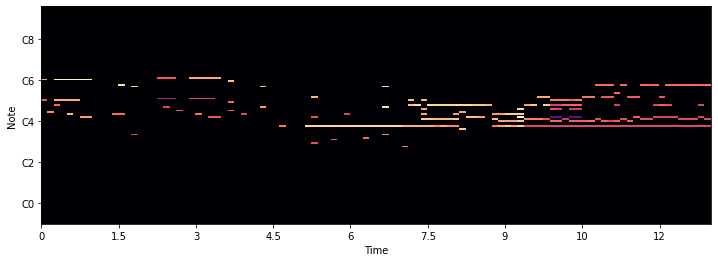

In [ ]:
with open('/content/drive/My Drive/RNN_generatedtext/results_lstm_t02_n1000.txt', 'r') as file:
    results_lstm_t02_n1000 = file.read()

pr_lstm_t02_n1000 = text_to_pianoroll(results_lstm_t02_n1000)

plt.figure(figsize=(12, 4))
plot_piano_roll(pr_lstm_t02_n1000)
plt.show()

pm_lstm_t02_n1000 = piano_roll_to_pretty_midi(pr_lstm_t02_n1000)

pm_lstm_t02_n1000.write('/content/drive/My Drive/RNN_midi_results/midi_lstm_t02_n1000.mid')

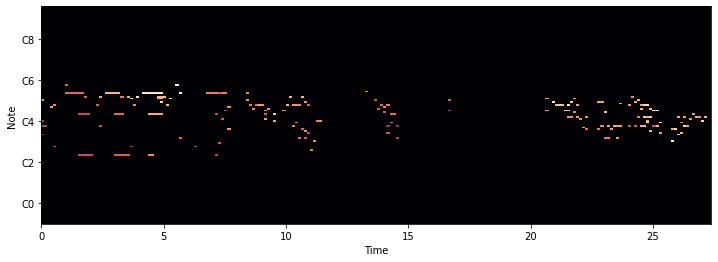

In [ ]:
with open('/content/drive/My Drive/RNN_generatedtext/results_lstm_t08_n1000.txt', 'r') as file:
    results_lstm_t08_n1000 = file.read()

pr_lstm_t08_n1000 = text_to_pianoroll(results_lstm_t08_n1000)

plt.figure(figsize=(12, 4))
plot_piano_roll(pr_lstm_t08_n1000)
plt.show()

pm_lstm_t08_n1000 = piano_roll_to_pretty_midi(pr_lstm_t08_n1000)

pm_lstm_t08_n1000.write('/content/drive/My Drive/RNN_midi_results/midi_lstm_t08_n1000.mid')

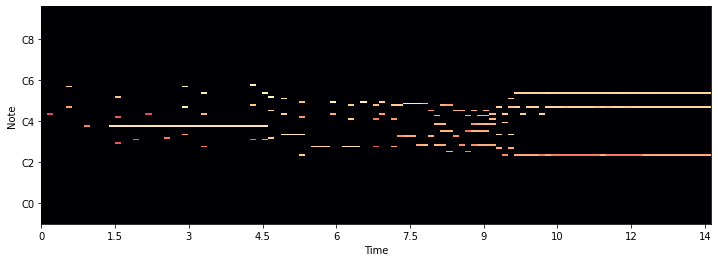

In [ ]:
with open('/content/drive/My Drive/RNN_generatedtext/results_gru_t02_n1000.txt', 'r') as file:
    results_gru_t02_n1000 = file.read()

pr_gru_t02_n1000 = text_to_pianoroll(results_gru_t02_n1000)

plt.figure(figsize=(12, 4))
plot_piano_roll(pr_gru_t02_n1000)
plt.show()

pm_gru_t02_n1000 = piano_roll_to_pretty_midi(pr_gru_t02_n1000)

pm_gru_t02_n1000.write('/content/drive/My Drive/RNN_midi_results/midi_gru_t02_n1000.mid')

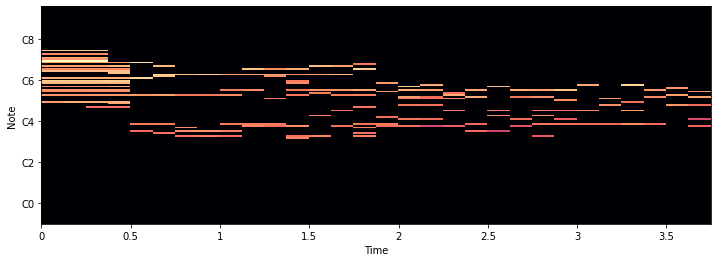

In [ ]:
with open('/content/drive/My Drive/RNN_generatedtext/results_gru_t05_n1000.txt', 'r') as file:
    results_gru_t05_n1000 = file.read()

pr_gru_t05_n1000 = text_to_pianoroll(results_gru_t05_n1000)

plt.figure(figsize=(12, 4))
plot_piano_roll(pr_gru_t05_n1000)
plt.show()

pm_gru_t05_n1000 = piano_roll_to_pretty_midi(pr_gru_t05_n1000)

pm_gru_t05_n1000.write('/content/drive/My Drive/RNN_midi_results/midi_gru_t05_n1000.mid')

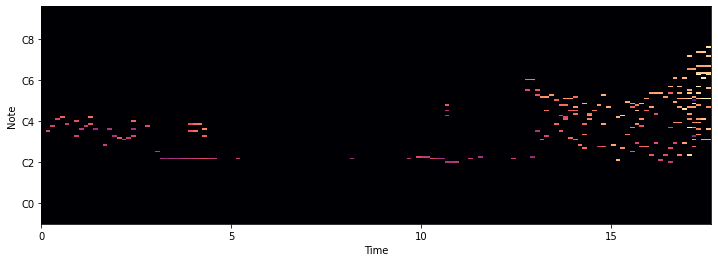

In [ ]:
with open('/content/drive/My Drive/RNN_generatedtext/results_gru_t08_n1000.txt', 'r') as file:
    results_gru_t08_n1000 = file.read()

pr_gru_t08_n1000 = text_to_pianoroll(results_gru_t08_n1000)

plt.figure(figsize=(12, 4))
plot_piano_roll(pr_gru_t08_n1000)
plt.show()

pm_gru_t08_n1000 = piano_roll_to_pretty_midi(pr_gru_t08_n1000)

pm_gru_t08_n1000.write('/content/drive/My Drive/RNN_midi_results/midi_gru_t08_n1000.mid')

In [ ]:
# define a function for a smarter call of the pipeline

def text2midi(path):

  with open(path, 'r') as file:
      results = file.read()

  pr = text_to_pianoroll(results)

  plt.figure(figsize=(12, 4))
  plot_piano_roll(pr)
  plt.show()

  pm = piano_roll_to_pretty_midi(pr)

  new_name = '_'.join(['midi']+path.split('/')[-1].split('.')[0].split('_')[1:])+'.mid'

  file_pathname = os.path.join('/content/drive/My Drive/RNN_midi_results', new_name)

  pm.write(file_pathname)

results_lstm_t05_n1000_4.txt


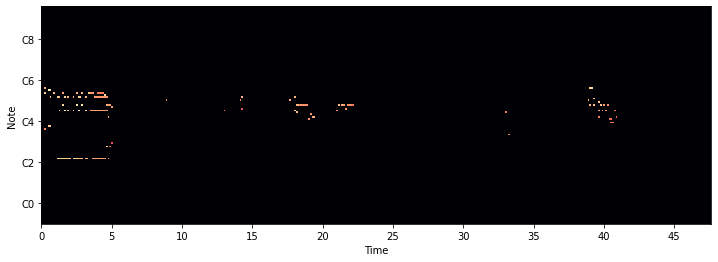

results_lstm_t05_n1000_5.txt


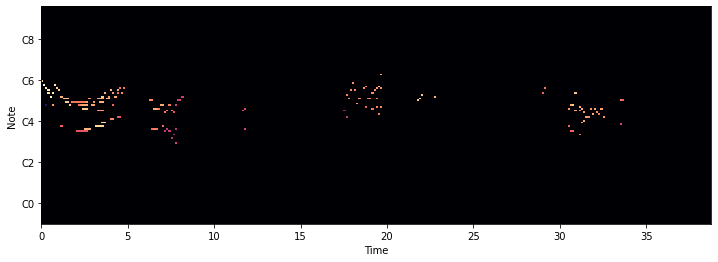

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[8:][:2]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)



results_lstm_t05_n1000_8.txt


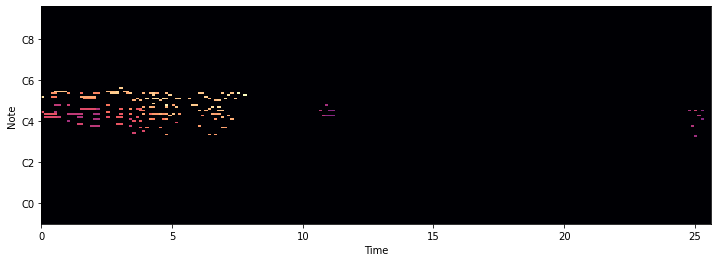

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[8:][3:4]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)



results_lstm_t05_n1000_7.txt


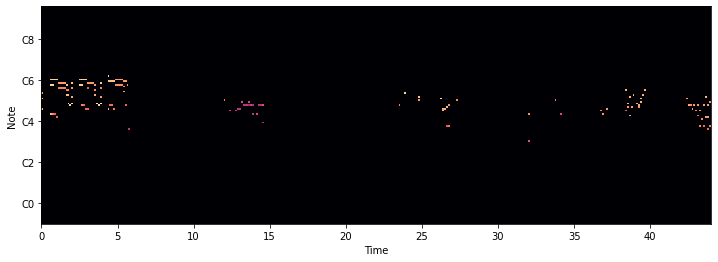

results_lstm_t05_n1000_6.txt


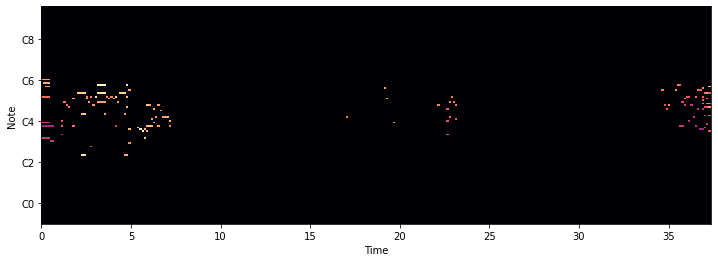

results_lstm_t05_n1000_3.txt


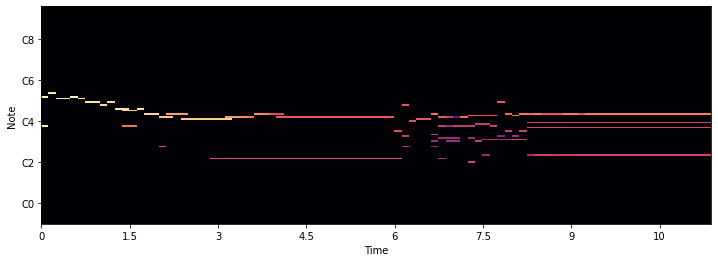

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[8:][5:8]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)



results_gru_t05_n1000_3.txt


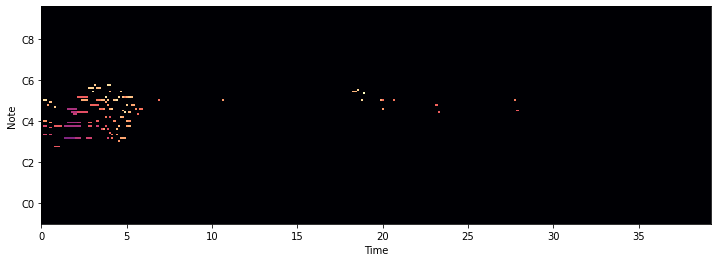

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[8:][10:11]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)



results_gru_t05_n1000_1.txt


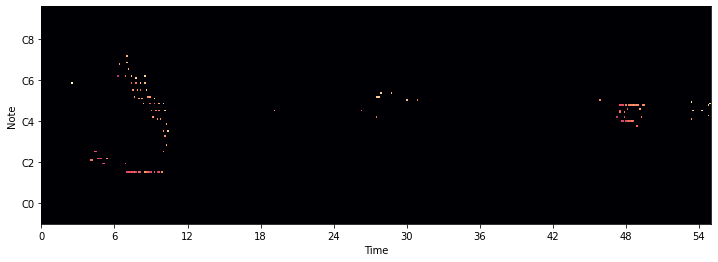

results_gru_t05_n1000_7.txt


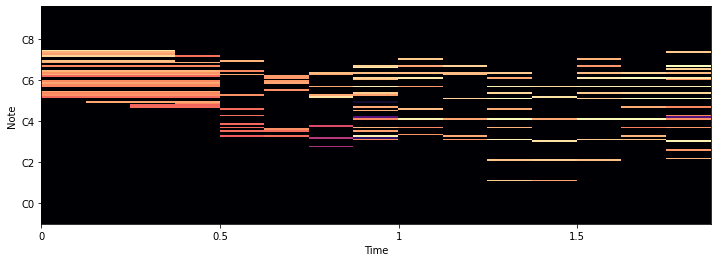

results_gru_t05_n1000_8.txt


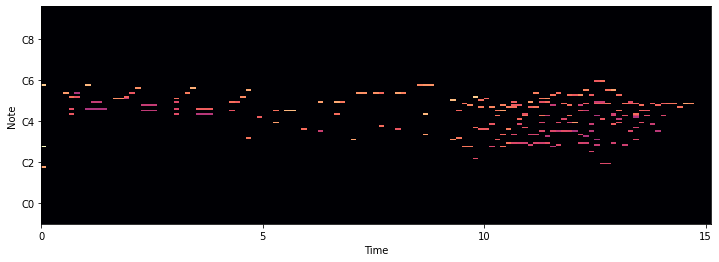

results_gru_t05_n1000_2.txt


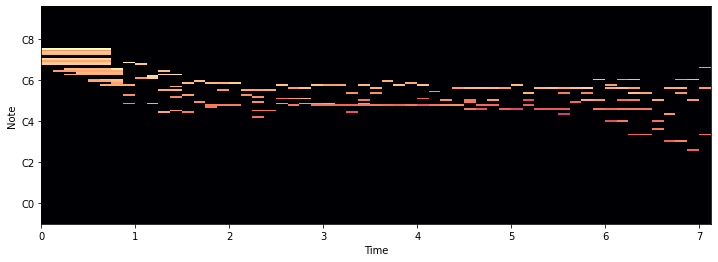

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[8:][12:16]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)



results_gru_t05_n1000_5.txt


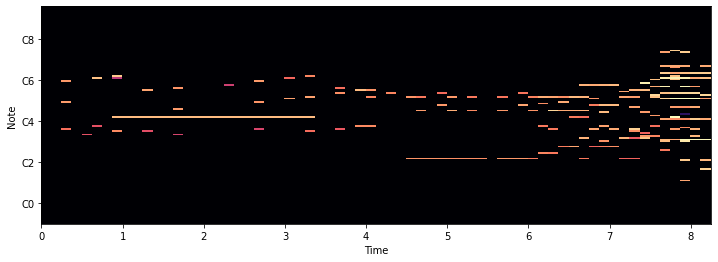

results_gru_t05_n1000_9.txt


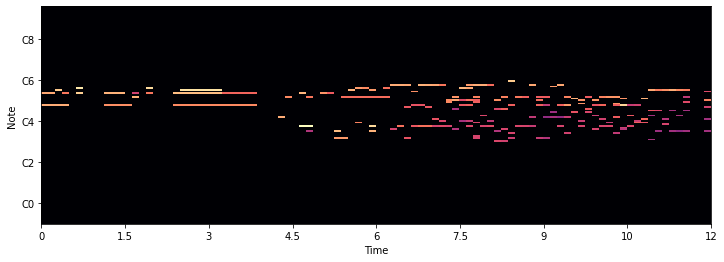

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[8:][18:]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)



## Transformation Pipeline for totally artificial sequences

In [ ]:
os.listdir('/content/drive/My Drive/RNN_generatedtext')

['results_lstm_t001_n1000.txt',
 'results_lstm_t02_n1000.txt',
 'results_lstm_t05_n1000.txt',
 'results_lstm_t08_n1000.txt',
 'results_gru_t001_n1000.txt',
 'results_gru_t02_n1000.txt',
 'results_gru_t05_n1000.txt',
 'results_gru_t08_n1000.txt',
 'results_lstm_t05_n1000_1.txt',
 'results_lstm_t05_n1000_2.txt',
 'results_lstm_t05_n1000_3.txt',
 'results_lstm_t05_n1000_4.txt',
 'results_lstm_t05_n1000_5.txt',
 'results_lstm_t05_n1000_6.txt',
 'results_lstm_t05_n1000_7.txt',
 'results_lstm_t05_n1000_8.txt',
 'results_lstm_t05_n1000_9.txt',
 'results_lstm_t05_n1000_10.txt',
 'results_gru_t05_n1000_1.txt',
 'results_gru_t05_n1000_2.txt',
 'results_gru_t05_n1000_3.txt',
 'results_gru_t05_n1000_4.txt',
 'results_gru_t05_n1000_5.txt',
 'results_gru_t05_n1000_6.txt',
 'results_gru_t05_n1000_7.txt',
 'results_gru_t05_n1000_8.txt',
 'results_gru_t05_n1000_9.txt',
 'results_gru_t05_n1000_10.txt',
 'results_lstm_t05_n1000_11.txt',
 'results_lstm_t05_n1000_12.txt',
 'results_lstm_t05_n1000_13.txt',


In [ ]:
os.listdir('/content/drive/My Drive/RNN_generatedtext')[28:]   # totally artificial lstm-based

['results_lstm_t05_n1000_11.txt',
 'results_lstm_t05_n1000_12.txt',
 'results_lstm_t05_n1000_13.txt',
 'results_lstm_t05_n1000_14.txt',
 'results_lstm_t05_n1000_15.txt',
 'results_lstm_t05_n1000_16.txt',
 'results_lstm_t05_n1000_17.txt',
 'results_lstm_t05_n1000_18.txt',
 'results_lstm_t05_n1000_19.txt',
 'results_lstm_t05_n1000_20.txt']

In [ ]:
os.listdir('/content/drive/My Drive/RNN_generatedtext')[38:]   # totally artificial gru-based

['results_gru_t05_n1000_15.txt',
 'results_gru_t05_n1000_17.txt',
 'results_gru_t05_n1000_14.txt',
 'results_gru_t05_n1000_13.txt',
 'results_gru_t05_n1000_20.txt',
 'results_gru_t05_n1000_18.txt',
 'results_gru_t05_n1000_19.txt',
 'results_gru_t05_n1000_16.txt',
 'results_gru_t05_n1000_12.txt',
 'results_gru_t05_n1000_11.txt']

### LSTM-based compositions

results_lstm_t05_n1000_11.txt


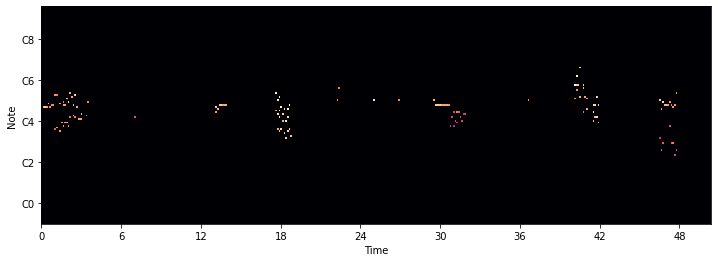

results_lstm_t05_n1000_12.txt


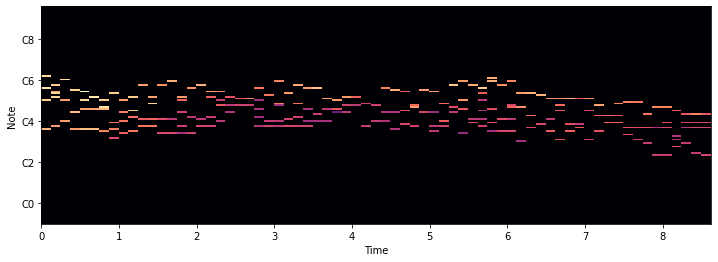

results_lstm_t05_n1000_13.txt


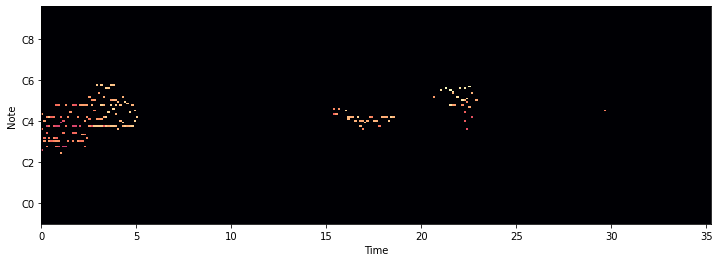

results_lstm_t05_n1000_14.txt


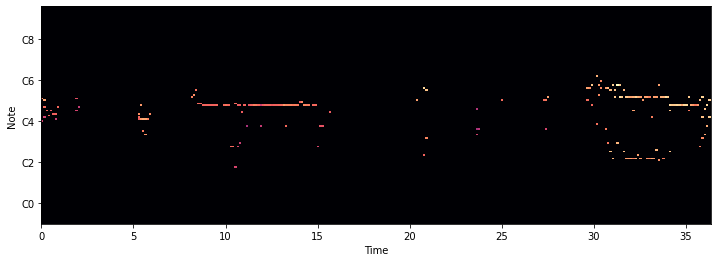

results_lstm_t05_n1000_15.txt


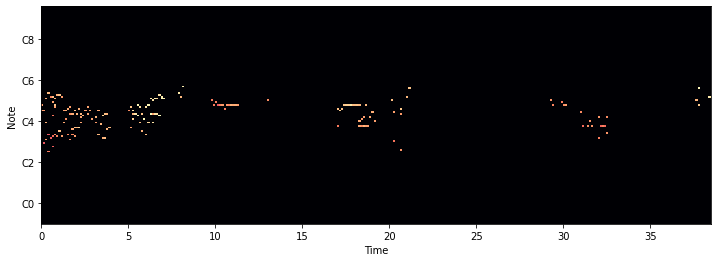

results_lstm_t05_n1000_16.txt


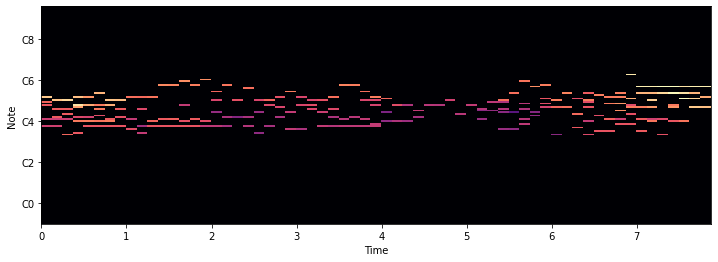

results_lstm_t05_n1000_17.txt


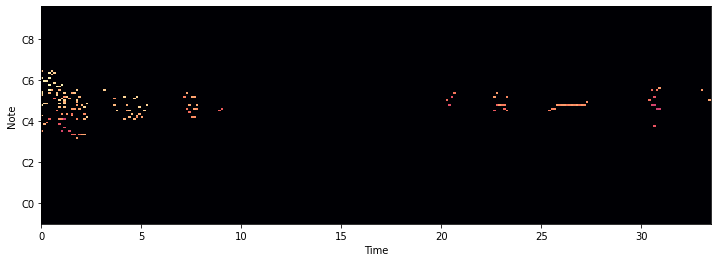

results_lstm_t05_n1000_18.txt


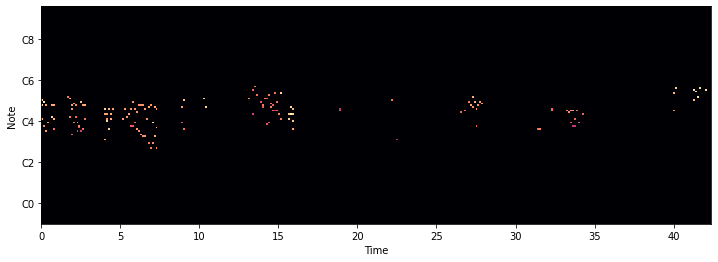

results_lstm_t05_n1000_19.txt


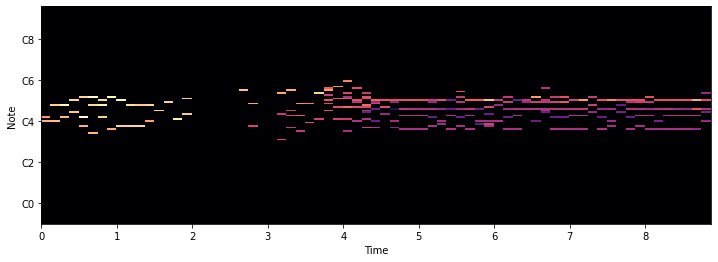

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[28:37]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)

### GRU-based compositions

results_gru_t05_n1000_15.txt


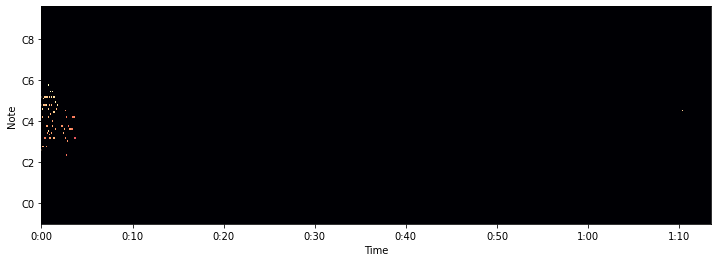

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[38:39]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)

results_gru_t05_n1000_14.txt


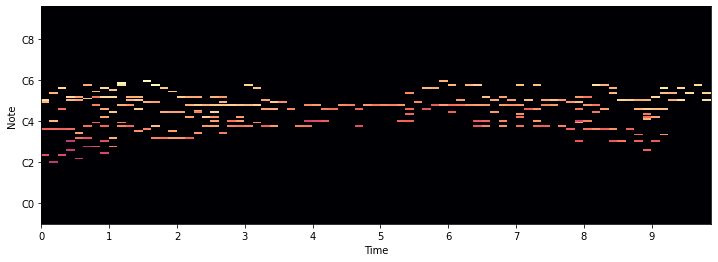

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[40:41]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)

results_gru_t05_n1000_20.txt


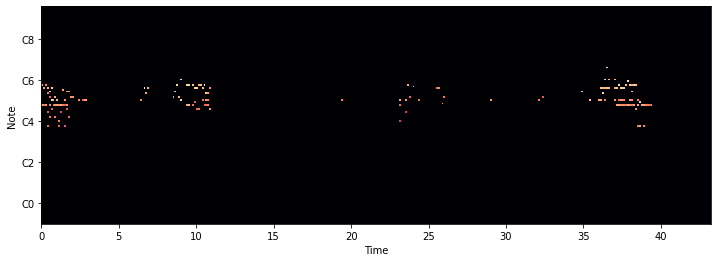

results_gru_t05_n1000_18.txt


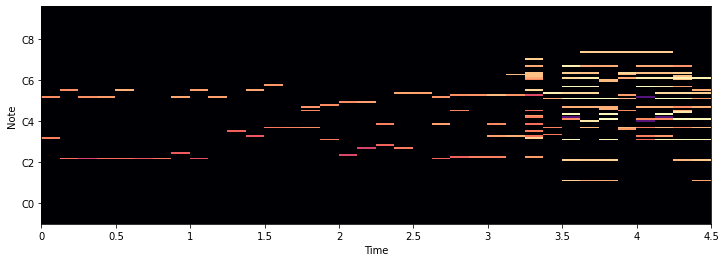

results_gru_t05_n1000_19.txt


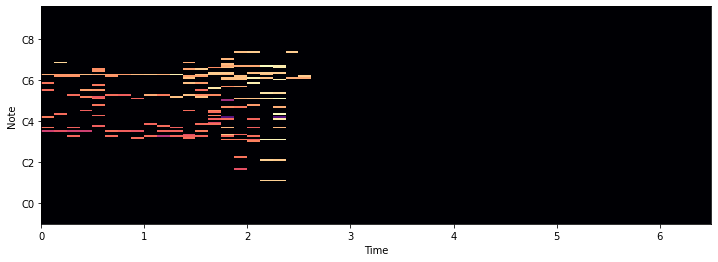

results_gru_t05_n1000_16.txt


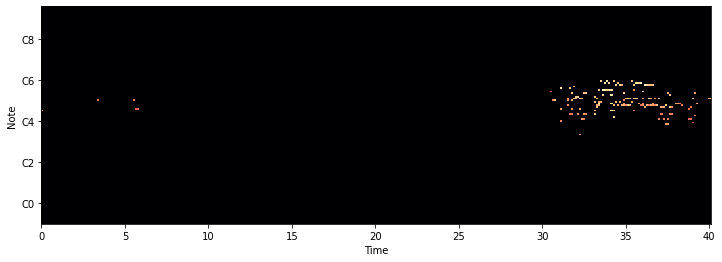

results_gru_t05_n1000_12.txt


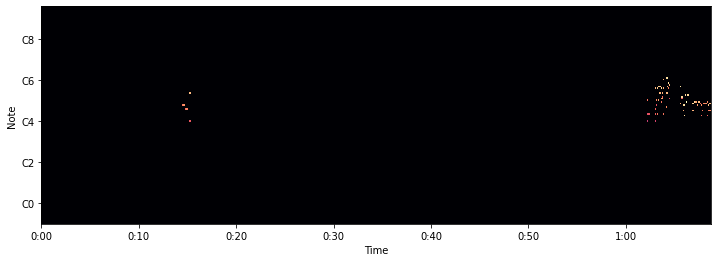

results_gru_t05_n1000_11.txt


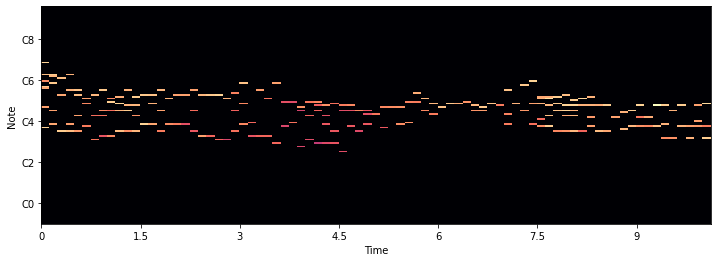

In [ ]:
generated_text_files = os.listdir('/content/drive/My Drive/RNN_generatedtext')[42:]

for file in generated_text_files:

  print(file)

  path = os.path.join('/content/drive/My Drive/RNN_generatedtext', file)

  text2midi(path)